This notebook demonstrates how to rotate 2D and 3D vectors using rotation matrices, and visualizes the results with plots using matplotlib.

In [63]:
# Imports libs
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Rotating 2D vectors

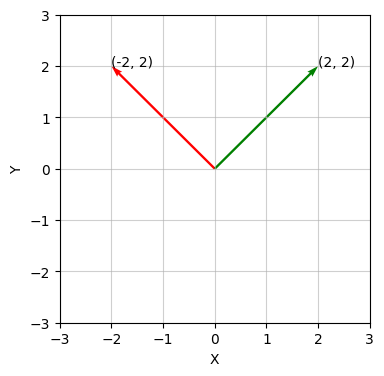

In [64]:
# First, define a function to draw 2D vectors.
# This will be used to visualize vectors before and after rotation.
def plot_2d_vectors(vectors, annotation=False):
    """
    Plot 2D vectors on a graph.

    Parameters:
    vectors (np.array): A 2D array where each row represents a 2D vector with two components (x, y).
    annotation (bool): If True, the function will annotate each vector on the plot with its coordinates.
    """
    assert (
        vectors.ndim == 2 and vectors.shape[1] == 2
    ), "The dimension of the argument 'vectors' is not 2"

    # Set graph size
    plt.figure(figsize=(4, 4))

    # Colors for the vectors (cycling through 5 colors)
    colors = ["r", "g", "b", "m", "y"]

    for i, vector in enumerate(vectors):
        plt.quiver(
            0,
            0,
            vector[0],
            vector[1],
            angles="xy",
            scale_units="xy",
            scale=1,
            color=colors[i % len(colors)],
        )
        if annotation:
            plt.text(vector[0], vector[1], f"({vector[0]:.0f}, {vector[1]:.0f})")

    # Display the graph
    # Compute limits of X and Y axes
    x_lim, y_lim = np.max(np.abs(vectors), axis=0) + 1
    plt.xlim([-x_lim, x_lim])
    plt.ylim([-y_lim, y_lim])
    # Graph decorations
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(alpha=0.6)

    plt.show()

# Define 2D vectors
A = np.array([[-2, 2], [2, 2]])
plot_2d_vectors(A, annotation=True)


## Rotating a 2D vector around the origin (point) by θ

The matrix for rotating a vector counterclockwise in 2D is:

$$ R(\theta) =
\left[\begin{matrix}\cos{\left(\theta \right)} & - \sin{\left(\theta \right)}\\
\sin{\left(\theta \right)} & \cos{\left(\theta \right)}\end{matrix}\right] $$


For clockwise rotation, invert the sign of the sine:
$$ R\_clockwise(\theta) =
\left[\begin{matrix}\cos{\left(\theta \right)} & \sin{\left(\theta \right)}\\
- \sin{\left(\theta \right)} & \cos{\left(\theta \right)}\end{matrix}\right] $$

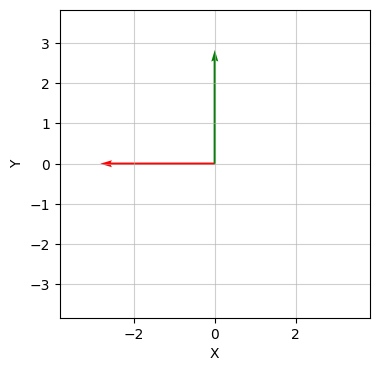

In [65]:
def generate_rotation_matrix_2d(theta):
    """
    Generate a matrix for rotating vectors in 2D.
    """
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])


# Example usage:
# Define 2D vectors (same vectors as we've seen above)
A = np.array([[-2, 2], [2, 2]])

# Rotate vectors by 45 degrees
# theta = 45 degrees = np.pi/4
theta_ = np.pi / 4
A_rotated = (generate_rotation_matrix_2d(theta_) @ A.T).T

# Draw vectors after pi/4 rotation
plot_2d_vectors(A_rotated)

# Rotating 3D vectors

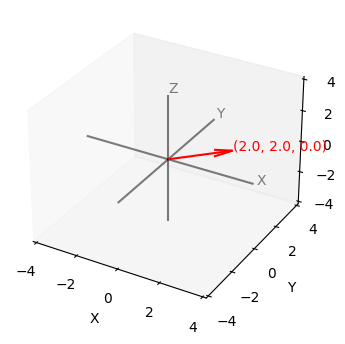

In [66]:
# Define a function to draw 3D vectors.
def plot_3d_vectors(vectors, annotation=False):
    """
    Plot 3D vectors on a graph.

    Parameters:
    vectors (np.array): A 2D array where each row represents a 3D vector with three components (x, y, z).
    annotation (bool): If True, the function will annotate each vector on the plot with its coordinates.
    """
    assert (
        vectors.ndim == 2 and vectors.shape[1] == 3
    ), "Each vector should be a 3-component array within a 2D NumPy array."

    # Create a new figure for the 3D plot
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(111, projection="3d")

    # Colors for the vectors (cycling through 5 colors)
    colors = ["r", "g", "b", "m", "y"]

    for i, vector in enumerate(vectors):
        c = colors[i % len(colors)]
        # Plotting the vector
        ax.quiver(0, 0, 0, vector[0], vector[1], vector[2], color=c)
        # Annotating the vector with its coordinates
        if annotation:
            ax.text(
                vector[0],
                vector[1],
                vector[2],
                f"({vector[0]:.1f}, {vector[1]:.1f}, {vector[2]:.1f})",
                color=c,
            )

    # Compute limits of X, Y and Z axes
    max_val = np.max(np.abs(vectors)) + 2
    kwargs = {"alpha": 0.5, "color": "k"}

    # Show origin axes (x, y, z)
    ax.plot([-max_val, max_val], [0, 0], [0, 0], **kwargs)
    ax.text(max_val + 0.2, 0, 0, "X", **kwargs)
    ax.plot([0, 0], [-max_val, max_val], [0, 0], **kwargs)
    ax.text(0, max_val + 0.2, 0, "Y", **kwargs)
    ax.plot([0, 0], [0, 0], [-max_val, max_val], **kwargs)
    ax.text(0, 0, max_val + 0.2, "Z", **kwargs)

    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])
    ax.set_zlim([-max_val, max_val])

    # Graph decoration
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.grid(visible=None)

    plt.show()


# Example usage:
# Define 3D vectors
B = np.array(
    [
        [2, 2, 0],
    ]
)
# Plot 3D vectors with annotations
plot_3d_vectors(B, annotation=True)

## Rotating a 3D vector around the x-axis by θ

The matrix to rotate a 3D vector counterclockwise around the x-axis by θ is:

$$ Rx(\theta) =
\left[\begin{matrix}
1 & 0 & 0\\
0 & \cos{\left(\theta \right)} & - \sin{\left(\theta \right)}\\
0 & \sin{\left(\theta \right)} & \cos{\left(\theta \right)}\\
\end{matrix}\right] $$

<br><br>

For clockwise rotation, invert the sign of the sine:
$$ Rx\_clockwise(\theta) =
\left[\begin{matrix}
1 & 0 & 0\\
0 & \cos{\left(\theta \right)} & \sin{\left(\theta \right)}\\
0 & - \sin{\left(\theta \right)} & \cos{\left(\theta \right)}\\
\end{matrix}\right] $$

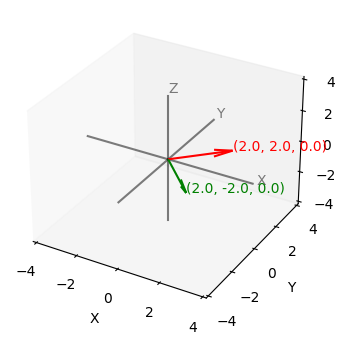

In [67]:
def gen_R_matrix_3d_x(theta):
    """
    Generate a matrix for rotating vectors around the x-axis in 3D.
    """
    return np.array(
        [
            [1, 0, 0],
            [0, np.cos(theta), -np.sin(theta)],
            [0, np.sin(theta), np.cos(theta)],
        ]
    )


# Example usage:
# Define 3D vectors (same vectors as we've seen above)
B = np.array(
    [
        [2, 2, 0],
    ]
)
# Rotate vector B (2,2,0) around the x-axis by 180 degrees
# theta_x = 180 degs = np.pi
theta_x = np.pi
B_x_rotated = (gen_R_matrix_3d_x(theta_x) @ B.T).T

# Draw vectors before and after rotation
plot_3d_vectors(np.r_[B, B_x_rotated], annotation=True)

## Rotating a 3D vector around the y-axis by θ

The matrix to rotate a 3D vector counterclockwise around the y-axis by θ is:

$$ Ry(\theta) =
\left[\begin{matrix}
\cos{\left(\theta \right)} & 0 & \sin{\left(\theta \right)}\\
0 & 1 & 0\\
- \sin{\left(\theta \right)} & 0 & \cos{\left(\theta \right)}\\
\end{matrix}\right] $$


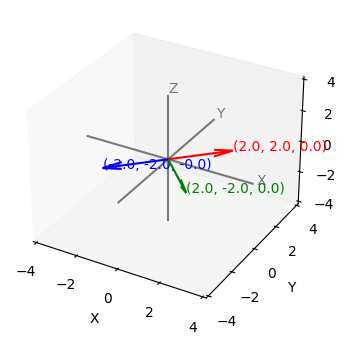

In [68]:
def gen_R_matrix_3d_y(theta):
    return np.array(
        [
            [np.cos(theta), 0, np.sin(theta)],
            [0, 1, 0],
            [-np.sin(theta), 0, np.cos(theta)],
        ]
    )


# Rotate vector B_x_rotated (2,-2,0) around the y-axis by 180 degrees
# 180 degs = np.pi
theta_y = np.pi
B_y_rotated = (gen_R_matrix_3d_y(theta_y) @ B_x_rotated.T).T

# Draw vectors before and after rotation
plot_3d_vectors(np.r_[B, B_x_rotated, B_y_rotated], annotation=True)

## Rotating a 3D vector around the z-axis by θ

The matrix to rotate a 3D vector counterclockwise around the z-axis by θ is:

$$ Rz(\theta) =
\left[\begin{matrix}
\cos{\left(\theta \right)} & - \sin{\left(\theta \right)} & 0\\
\sin{\left(\theta \right)} & \cos{\left(\theta \right)} & 0\\
0 & 0 & 1\\
\end{matrix}\right] $$

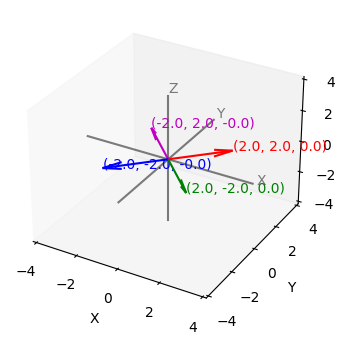

In [69]:
def gen_R_matrix_3d_z(theta):
    return np.array(
        [
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta), np.cos(theta), 0],
            [0, 0, 1],
        ]
    )


# Rotate vector B_y_rotated (-2,-2,0) around the z-axis by -90 degrees
# theta = -90 degs = - np.pi/2
theta_z = -np.pi / 2
B_z_rotated = (gen_R_matrix_3d_z(theta_z) @ B_y_rotated.T).T

# Draw vectors before and after rotation
plot_3d_vectors(np.r_[B, B_x_rotated, B_y_rotated, B_z_rotated], annotation=True)

## Rotating a 3D vector

In this process, the vector B (2, 2, 0) undergoes a series of rotations about each principal axis. Specifically, it is rotated:

- 180 degrees counterclockwise about the x-axis,
- 180 degrees counterclockwise about the y-axis, and
- 90 degrees clockwise about the z-axis (as indicated by the negative degree).

These rotations can be expressed in a single operation using the following formula:

```
(gen_R_matrix_3d_z(theta_z) @ gen_R_matrix_3d_y(theta_y) @ gen_R_matrix_3d_x(theta_x) @ B.T).T
= (Rz(theta) @ Ry(theta) @ Rx(theta) @ B.T).T
```

Here, **theta_x**, **theta_y**, and **theta_z** are the angles of rotation around the x, y, and z axes, respectively. The rotations are applied in sequence, combining into a single transformation matrix that is applied to vector B.

A function named **gen_R_matrix_3d** will be defined to perform the above formula. To verify that the rotation matrix produced by this function behaves as expected, it will be tested using vector C (2, 2, 0). This step confirms that the function accurately applies the combined rotations to any given vector.


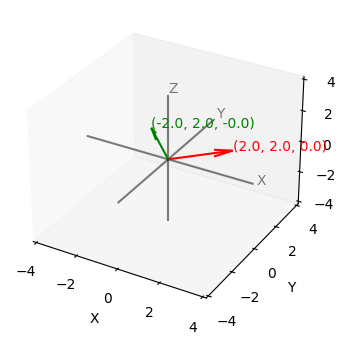

In [71]:
def gen_R_matrix_3d(theta_x, theta_y, theta_z):
    """
    Generate a 3D rotation matrix that combines rotations around the x, y, and z axes.

    Parameters:
    theta_x (float): Rotation angle around the x-axis in radians.
    theta_y (float): Rotation angle around the y-axis in radians.
    theta_z (float): Rotation angle around the z-axis in radians.

    Returns:
    np.array: A 3x3 rotation matrix that applies the specified rotations.
    """
    Rx = np.array(
        [
            [1, 0, 0],
            [0, np.cos(theta_x), -np.sin(theta_x)],
            [0, np.sin(theta_x), np.cos(theta_x)],
        ]
    )
    Ry = np.array(
        [
            [np.cos(theta_y), 0, np.sin(theta_y)],
            [0, 1, 0],
            [-np.sin(theta_y), 0, np.cos(theta_y)],
        ]
    )
    Rz = np.array(
        [
            [np.cos(theta_z), -np.sin(theta_z), 0],
            [np.sin(theta_z), np.cos(theta_z), 0],
            [0, 0, 1],
        ]
    )
    return Rz @ Ry @ Rx


# Define radians = (theta_x, theta_y, theta_z)
radians = (np.pi, np.pi, -np.pi / 2)

# Rotate a vector (2,2,0) with the gen_R_matrix_3d function
C = np.array([[2, 2, 0]])
C_rotated = (gen_R_matrix_3d(*radians) @ (C.T)).T

# Draw vectors before and after rotation
plot_3d_vectors(np.r_[C, C_rotated], annotation=True)

As shown in the graph above, it is confirmed that the **gen_R_matrix_3d** function performs accurately, as the rotated vector **C_rotated** (-2, 2, 0) is identical to the vector **B_z_rotated** (-2, 2, 0).

# Reference
https://en.wikipedia.org/wiki/Rotation_matrix
